In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import precision_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.utils import class_weight

In [ ]:
# loading the data
data = pd.read_csv('Loan Approval.csv')

In [ ]:
# coping data
df=data.copy()

In [ ]:
# define features and target
x=df.drop(["Loan_ID","Loan_Status"],axis=1)
y=df[["Loan_Status"]]

# split the data into train and test sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# apply EDA

In [ ]:
#check for first 5 rows of the train data
train_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
533,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban
452,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
266,Male,Yes,2,Graduate,No,4708,1387.0,150.0,360.0,1.0,Semiurban


In [ ]:
#check columns informations
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 90 to 559
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             479 non-null    object 
 1   Married            488 non-null    object 
 2   Dependents         476 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      463 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         471 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     450 non-null    float64
 10  Property_Area      491 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 46.0+ KB


In [ ]:
#check basic informations of numeric columns
train_x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,471.000000,480.000000,450.000000
mean,5619.018330,1525.863381,147.324841,342.550000,0.837778
std,6659.021257,2787.398712,88.482349,63.953251,0.369065
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2932.000000,0.000000,100.000000,360.000000,1.000000
50%,3850.000000,997.000000,128.000000,360.000000,1.000000
75%,5763.000000,2167.500000,165.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
#check for any zero values to handle it if it's not reasonable
train_x[train_x==0].count()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    228
LoanAmount             0
Loan_Amount_Term       0
Credit_History        73
Property_Area          0
dtype: int64

In [ ]:
#check unique values of non numeric columns and it's frequancy on our data

In [ ]:
train_x['Gender'].value_counts()

Male      389
Female     90
Name: Gender, dtype: int64

In [ ]:
train_x['Married'].value_counts()

Yes    323
No     165
Name: Married, dtype: int64

In [ ]:
train_x['Self_Employed'].value_counts()

No     394
Yes     69
Name: Self_Employed, dtype: int64

In [ ]:
train_x['Education'].value_counts()

Graduate        383
Not Graduate    108
Name: Education, dtype: int64

In [ ]:
train_x['Dependents'].value_counts()

0     264
1      86
2      85
3+     41
Name: Dependents, dtype: int64

In [ ]:
train_x['Property_Area'].value_counts()

Semiurban    185
Urban        163
Rural        143
Name: Property_Area, dtype: int64

In [ ]:
#check the distribution of the numerical data

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

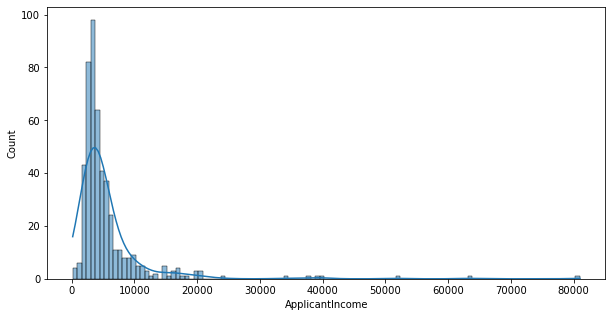

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.histplot(train_x['ApplicantIncome'],kde=True)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

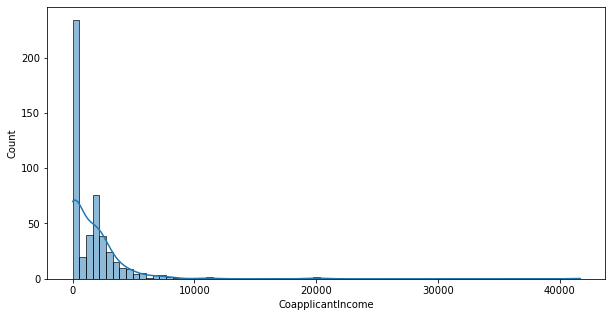

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.histplot(train_x['CoapplicantIncome'],kde=True)

<Axes: xlabel='LoanAmount', ylabel='Count'>

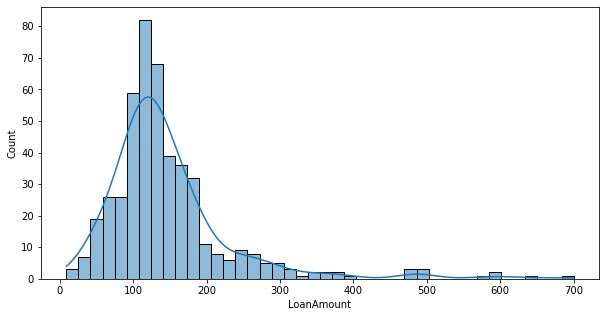

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.histplot(train_x['LoanAmount'],kde=True)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

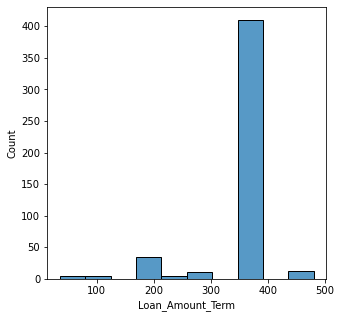

In [ ]:
fig=plt.figure(figsize=(5,3))
sns.histplot(train_x['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Count'>

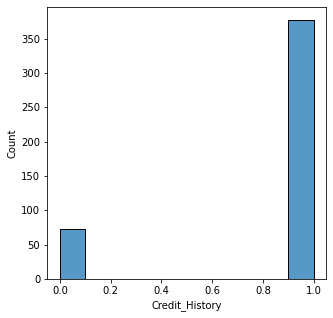

In [ ]:
fig=plt.figure(figsize=(5,3))
sns.histplot(train_x['Credit_History'])

In [ ]:
#data preparation and cleaning

In [ ]:
# as we can see the data is right skewed so we will apply a sqrt transformation

In [ ]:
# perform sqrt transformation on columns
train_x[['LoanAmount','ApplicantIncome','CoapplicantIncome']]=np.sqrt(train_x[['LoanAmount','ApplicantIncome','CoapplicantIncome']])
test_x[['LoanAmount','ApplicantIncome','CoapplicantIncome']]=np.sqrt(test_x[['LoanAmount','ApplicantIncome','CoapplicantIncome']])

<Axes: xlabel='LoanAmount', ylabel='Count'>

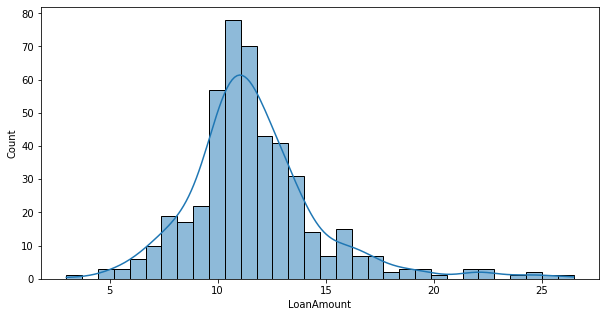

In [ ]:
# constract a sample to see the diffrence
fig=plt.figure(figsize=(10,5))
sns.histplot(train_x['LoanAmount'],kde=True)

In [ ]:
# now it's time to impute the missings

In [ ]:
train_x.isnull().sum()

Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     11
Credit_History       41
Property_Area         0
dtype: int64

In [ ]:
# encode non numeric values
train_x['Married'].replace(['Yes','No'],[1,0], inplace=True)
test_x['Married'].replace(['Yes','No'],[1,0], inplace=True)

train_x['Gender'].replace(['Male','Female'],[1,0], inplace=True)
test_x['Gender'].replace(['Male','Female'],[1,0], inplace=True)

train_x['Dependents'].replace(['3+','2','1','0'],[3,2,1,0], inplace=True)
test_x['Dependents'].replace(['3+','2','1','0'],[3,2,1,0], inplace=True)

train_x['Education'].replace(['Graduate','Not Graduate'],[1,0], inplace=True)
test_x['Education'].replace(['Graduate','Not Graduate'],[1,0], inplace=True)

train_x['Self_Employed'].replace(['Yes','No'],[1,0], inplace=True)
test_x['Self_Employed'].replace(['Yes','No'],[1,0], inplace=True)

train_x['Property_Area'].replace(['Urban','Semiurban','Rural'],[2,1,0], inplace=True)
test_x['Property_Area'].replace(['Urban','Semiurban','Rural'],[2,1,0], inplace=True)

In [ ]:
# impute misssing data using knn imputer
col=train_x.columns
imputer = KNNImputer()
train_x = imputer.fit_transform(train_x)
test_x = imputer.fit_transform(test_x)

In [ ]:
#convert the numpy array into dataframe
train_x = pd.DataFrame(train_x,columns=col)
test_x = pd.DataFrame(test_x,columns=col)

In [ ]:
train_x['Self_Employed'].value_counts()

0.0    412
1.0     69
0.2      6
0.4      3
0.6      1
Name: Self_Employed, dtype: int64

In [ ]:
train_x['Married'].value_counts()

1.0    325
0.0    165
0.4      1
Name: Married, dtype: int64

In [ ]:
train_x['Gender'].value_counts()

1.0    393
0.0     90
0.6      3
0.4      3
0.8      2
Name: Gender, dtype: int64

In [ ]:
train_x['Dependents'].value_counts()

0.0    264
1.0     88
2.0     85
3.0     41
1.2      5
0.6      3
0.4      2
1.4      1
1.6      1
1.8      1
Name: Dependents, dtype: int64

In [ ]:
# as we can see there are some values that should be handeled we will use a threshold of 05 in binary classes
# and x.5 in more than 2 classes

In [ ]:
train_x['Self_Employed'] = train_x['Self_Employed'].apply(lambda x: 1 if x > 0.5 else 0)
test_x['Self_Employed'] = test_x['Self_Employed'].apply(lambda x: 1 if x > 0.5 else 0)

train_x['Married'] = train_x['Married'].apply(lambda x: 1 if x > 0.5 else 0)
test_x['Married'] = test_x['Married'].apply(lambda x: 1 if x > 0.5 else 0)

train_x['Gender'] = train_x['Gender'].apply(lambda x: 1 if x > 0.5 else 0)
test_x['Gender'] = test_x['Gender'].apply(lambda x: 1 if x > 0.5 else 0)

train_x['Dependents'] = train_x['Dependents'].apply(lambda x: 0 if x < 0.5 else (1 if x <= 1.5 else 2))
test_x['Dependents'] = test_x['Dependents'].apply(lambda x: 0 if x < 0.5 else (1 if x <= 1.5 else 2))

In [ ]:
# decode non numeric data again
train_x['Married'].replace([1,0],['Yes','No'], inplace=True)
test_x['Married'].replace([1,0],['Yes','No'], inplace=True)

train_x['Gender'].replace([1,0],['Male','Female'], inplace=True)
test_x['Gender'].replace([1,0],['Male','Female'], inplace=True)

train_x['Dependents'].replace([3,2,1,0],['3+','2','1','0'], inplace=True)
test_x['Dependents'].replace([3,2,1,0],['3+','2','1','0'], inplace=True)

train_x['Education'].replace([1,0],['Graduate','Not Graduate'], inplace=True)
test_x['Education'].replace([1,0],['Graduate','Not Graduate'], inplace=True)

train_x['Self_Employed'].replace([1,0],['Yes','No'], inplace=True)
test_x['Self_Employed'].replace([1,0],['Yes','No'], inplace=True)

train_x['Property_Area'].replace([2,1,0],['Urban','Semiurban','Rural'], inplace=True)
test_x['Property_Area'].replace([2,1,0],['Urban','Semiurban','Rural'], inplace=True)

In [ ]:
train_x.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
# apply one hot encoding on categorical data
train_x=pd.get_dummies(train_x,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
test_x=pd.get_dummies(test_x,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [ ]:
# applying lable encoding on the target

In [ ]:
col=train_y.columns
l = LabelEncoder()
train_y = l.fit_transform(train_y)
test_y = l.fit_transform(test_y)

#convert the numpy array into df
train_y = pd.DataFrame(train_y,columns=col)
test_y = pd.DataFrame(test_y,columns=col)

C:\Users\maher\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\maher\anaconda\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
train_y.value_counts()

Loan_Status
1              332
0              159
dtype: int64

In [ ]:
# as we can see we have imbalances in the data, so will handel it using clss weight technique

In [ ]:
y=train_y['Loan_Status']
class_weights = class_weight.compute_class_weight('balanced', classes=y.unique(), y=y)

# Define the RandomForest Classifier
rf = RandomForestClassifier(class_weight='balanced')

In [ ]:
# apply ml models and check scores

In [ ]:
# using ada boost

In [ ]:
ada = AdaBoostClassifier(base_estimator=rf)
ada.fit(train_x,train_y)

C:\Users\maher\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\maher\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced'))

In [ ]:
y_pred = ada.predict(train_x)
acc = precision_score(train_y, y_pred)
acc*100

100.0

In [ ]:
y_pred = ada.predict(test_x)
acc = precision_score(test_y, y_pred)
acc*100

81.81818181818183

In [ ]:
cm = confusion_matrix(test_y, y_pred)
print(cm)

[[15 18]
 [ 9 81]]


In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        33
           1       0.82      0.90      0.86        90

    accuracy                           0.78       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.77      0.78      0.77       123



In [ ]:
# apply tuning and check if there is any improvement ?

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1]
}
grid_search = GridSearchCV(ada, param_grid, cv=5)

# Fit the grid search on the training data
grid_search.fit(train_x,train_y)

# Print the best hyperparameters and the corresponding performance score
print('Best hyperparameters:', grid_search.best_params_)

C:\Users\maher\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\maher\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\maher\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\maher\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\maher\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConver

Best hyperparameters: {'learning_rate': 0.5, 'n_estimators': 150}


C:\Users\maher\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\maher\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
t_ada = AdaBoostClassifier(learning_rate=0.5,n_estimators=150)
t_ada.fit(train_x,train_y)

C:\Users\maher\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=0.5, n_estimators=150)

In [ ]:
y_pred = t_ada.predict(train_x)
acc = precision_score(train_y, y_pred)
acc*100

81.61209068010076

In [ ]:
y_pred = t_ada.predict(test_x)
acc = precision_score(test_y, y_pred)
acc*100

86.0

In [ ]:
cm = confusion_matrix(test_y, y_pred)
print(cm)

[[19 14]
 [ 4 86]]


In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.58      0.68        33
           1       0.86      0.96      0.91        90

    accuracy                           0.85       123
   macro avg       0.84      0.77      0.79       123
weighted avg       0.85      0.85      0.84       123

